# Exploring 1st Iteration Data

### Setup

In [2]:
# General Imports
import nltk

In [3]:
# Add path to custom code
#  This is a bit of a hack to add the directory, in a general way, to path to load code
#  This hack
import os
import sys

# Set project related paths
base_path = os.path.dirname(os.getcwd())
dat_path = os.path.join(base_path, 'Data')

In [4]:
# Import custom code
sys.path.append(base_path)
from data import load_folder

### Functions

These are some quick functions to work with the data

In [5]:
from itertools import chain

In [6]:
def get_all_words(dat, field):
    
    all_words = [getattr(doc, field) for all_docs in dat for doc in all_docs]
    all_words = list(chain.from_iterable(all_words))
    
    return all_words

### Loading

In [7]:
# Load the data
paper_dat = load_folder('Papers', 'autism', dat_path)

# This is a hack to force load a particular folder, to get started.
#  I'm not sure, what the intended way to load all PRs is - fix this when sorted.
press_dat = load_folder('PRs', 'autism/2017-01-01', dat_path)

#### Sanity Check Loaded Data

In [29]:
# Check data sizes
print(len(paper_dat))
print(len(press_dat))
# Note: each of these elements is itself a list of objects

497
69


### Pre-Processing

In [30]:
# Collapse across all words in a given data type
all_paper_words = get_all_words(paper_dat, 'text')
all_press_words = get_all_words(press_dat, 'text')

### NLTK 

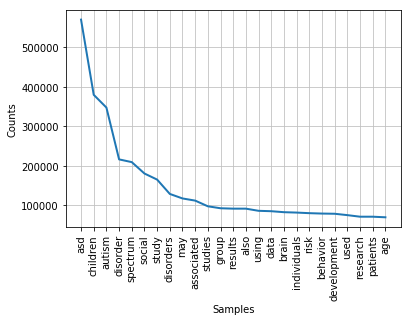

In [21]:
# Create and plot the frequency distribution of words - papers
paper_fd = nltk.FreqDist(all_paper_words)
paper_fd.plot(25)

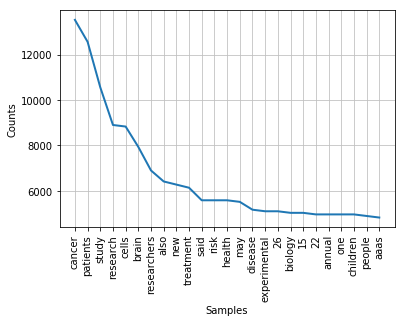

In [20]:
# Create and plot the frequency distribution of words - PRs
press_fd = nltk.FreqDist(all_press_words)
press_fd.plot(25)